In [6]:
import time
from enum import Enum
from typing import Optional

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
INDUSTRIES = {
#     "Transportation and Warehousing": ["VTO", "PVT", "GSP", "VIP", "VOS", "VSC"]
#     "rubber": ["BRC", "CSM", "DRC", "SRC"]
    # "consumer_goods": ["ADS", "LIX"] #LIX
#     "financials": ["BVH", "VHM", "SSI", "FUEVFVND", "VND", "KDH"] 
#      "consumer_services": ["MWG", "FRT", "DGW", "SKG", "VNS"] #
#     "basic_materials": ["MVB", "PHR", "SHI", "NHH", "VFG", "VIF"] # VFG, PHR
#     "IT": ["SAM", "CMG", "ST8"]
#     "industry": ["BMP", "PVP", "DVP", "TCL" ,"HAH"]
#     "elc": ["PPC", "TDM", "TMP", "SBA", "SHP"]
    "industries": ["industry/8500", "industry/8600", "industry/5300", "industry/9500", "industry/0500", "industry/8700", "industry/7500", "industry/5700", "industry/2700", "industry/3700", "industry/1300", "industry/8300", "industry/3300", "industry/1700", "industry/3500", "industry/5500", "industry/6500", "industry/2300", "industry/4500"]
}

In [46]:
from dataclasses import dataclass, asdict

industry_to_tcbs_ticker = {
    "automobiles_and_parts": "industry/3300",
    "banks": "industry/8300",
    "basic_resources": "industry/1700",
    "chemicals": "industry/1300",
    "construction_and_materials": "industry/2300",
    "financial_services": "industry/8700",
    "food_and_beverage": "industry/3500",
    "health_caer": "industry/4500",
    "industrial_goods_and_services": "industry/2700",
    "insurance": "industry/8500",
    "media": "industry/5500",
    "oil_and_gas": "industry/0500",
    "personal_and_household_goods": "industry/3700",
    "real_estate": "industry/8600",
    "retail": "industry/5300",
    "technology": "industry/9500",
    "telecommunications": "industry/6500",
    "travel_and_leisure": "industry/5700",
    "utilities": "industry/7500"
}

@dataclass
class IncomeStatement:
    ticker: str
    quarter: int
    year: int
    revenue: int
    year_revenue_growth: float
    quarter_revenue_growth: None
    cost_of_good_sold: float
    gross_profit: float
    operation_expense: float
    operation_profit: float
    year_operation_profit_growth: float
    quarter_operation_profit_growth: None
    interest_expense: float
    pre_tax_profit: float
    post_tax_profit: float
    share_holder_income: float
    year_share_holder_income_growth: float
    quarter_share_holder_income_growth: None
    invest_profit: None
    service_profit: None
    other_profit: None
    provision_expense: None
    operation_income: None
    ebitda: float

@dataclass
class FinancialRatio:
    ticker: str
    quarter: int
    year: int
    post_tax_on_pre_tax: float
    pre_tax_on_ebit: float
    ebit_on_revenue: float
    revenue_on_asset: float
    asset_on_equity: float
    gross_profit_margin: float
    operating_profit_margin: float
    post_tax_margin: float
    roe: float
    roa: float

class TCBS:
    def __init__(self):
        self.base_url = 'https://apipubaws.tcbs.com.vn/tcanalysis/v1/finance'

    def get_financial_ratio(self, ticker):
        if len(ticker) > 3:
            ticker = industry_to_tcbs_ticker[ticker]
        endpoint = "{base_url}/{ticker}/financialratio?yearly=0&isAll=true".format(base_url = self.base_url, ticker = ticker)
        resp = requests.get(endpoint)
        if resp.json() is None:
            return None

        financial_ratios = []
        for data in resp.json():
            financial_ratios.append(FinancialRatio(
                ticker = ticker,
                quarter = data['quarter'],
                year = data['year'],
                roe = data['roe'],
                roa = data['roa'],
                ebit_on_revenue = data['ebitOnRevenue'],
                post_tax_on_pre_tax = data['postTaxOnPreTax'],
                pre_tax_on_ebit = data['preTaxOnEbit'],
                revenue_on_asset = data['revenueOnAsset'],
                asset_on_equity = data['assetOnEquity'],
                gross_profit_margin = data['grossProfitMargin'],
                operating_profit_margin = data['operatingProfitMargin'],
                post_tax_margin = data['postTaxMargin']
            ))
        return financial_ratios
            

    def get_income_statement(self, ticker):
        endpoint = "{base_url}/{ticker}/incomestatement?yearly=0&isAll=true".format(base_url = self.base_url, ticker = ticker)
        resp = requests.get(endpoint)
        if resp.json() is None:
            return None
        
        income_statements = []
        for data in resp.json():
            income_statements.append(IncomeStatement(
                ticker = ticker,
                quarter = data['quarter'],
                year = data['year'],
                revenue = data['revenue'],
                year_revenue_growth = data['yearRevenueGrowth'],
                quarter_revenue_growth = data['quarterRevenueGrowth'],
                cost_of_good_sold = data['costOfGoodSold'],
                gross_profit = data['grossProfit'],
                operation_expense = data['operationExpense'],
                operation_profit = data['operationProfit'],
                year_operation_profit_growth = data['yearOperationProfitGrowth'],
                quarter_operation_profit_growth = data['quarterOperationProfitGrowth'],
                interest_expense = data['interestExpense'],
                pre_tax_profit = data['preTaxProfit'],
                post_tax_profit = data['postTaxProfit'],
                share_holder_income = data['shareHolderIncome'],
                year_share_holder_income_growth = data['yearShareHolderIncomeGrowth'],
                quarter_share_holder_income_growth = data['quarterShareHolderIncomeGrowth'],
                invest_profit = data['investProfit'],
                service_profit = data['serviceProfit'],
                other_profit = data['otherProfit'],
                provision_expense = data['provisionExpense'],
                operation_income = data['operationIncome'],
                ebitda = data['ebitda']
            ))

        return income_statements

In [34]:
tcbs = TCBS()
financial_ratios = []
for industry, tickers in INDUSTRIES.items():
    for ticker in tickers:
        print(ticker)
        financial_ratios.extend(tcbs.get_financial_ratio(ticker))
        
df_financial_ratios = pd.json_normalize(asdict(obj) for obj in financial_ratios)

industry/8500
industry/8600
industry/5300
industry/9500
industry/0500
industry/8700
industry/7500
industry/5700
industry/2700
industry/3700
industry/1300
industry/8300
industry/3300
industry/1700
industry/3500
industry/5500
industry/6500
industry/2300
industry/4500


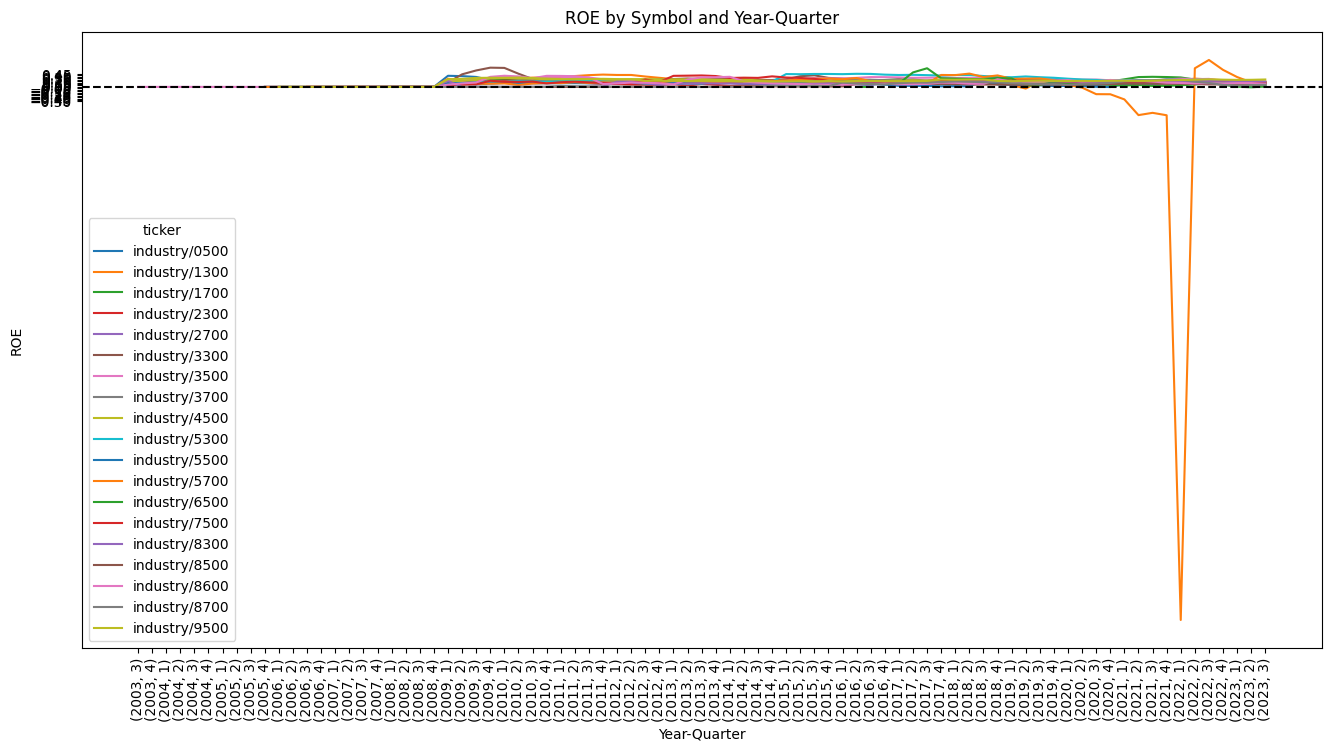

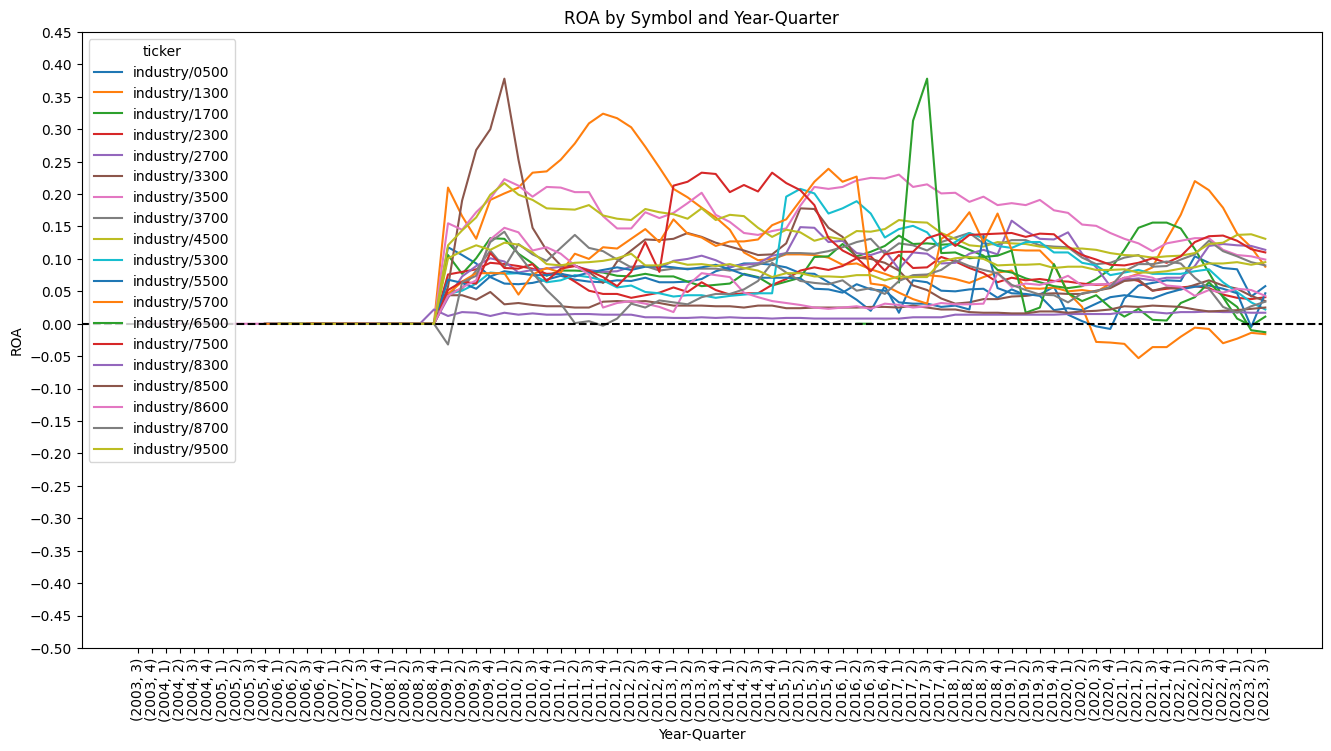

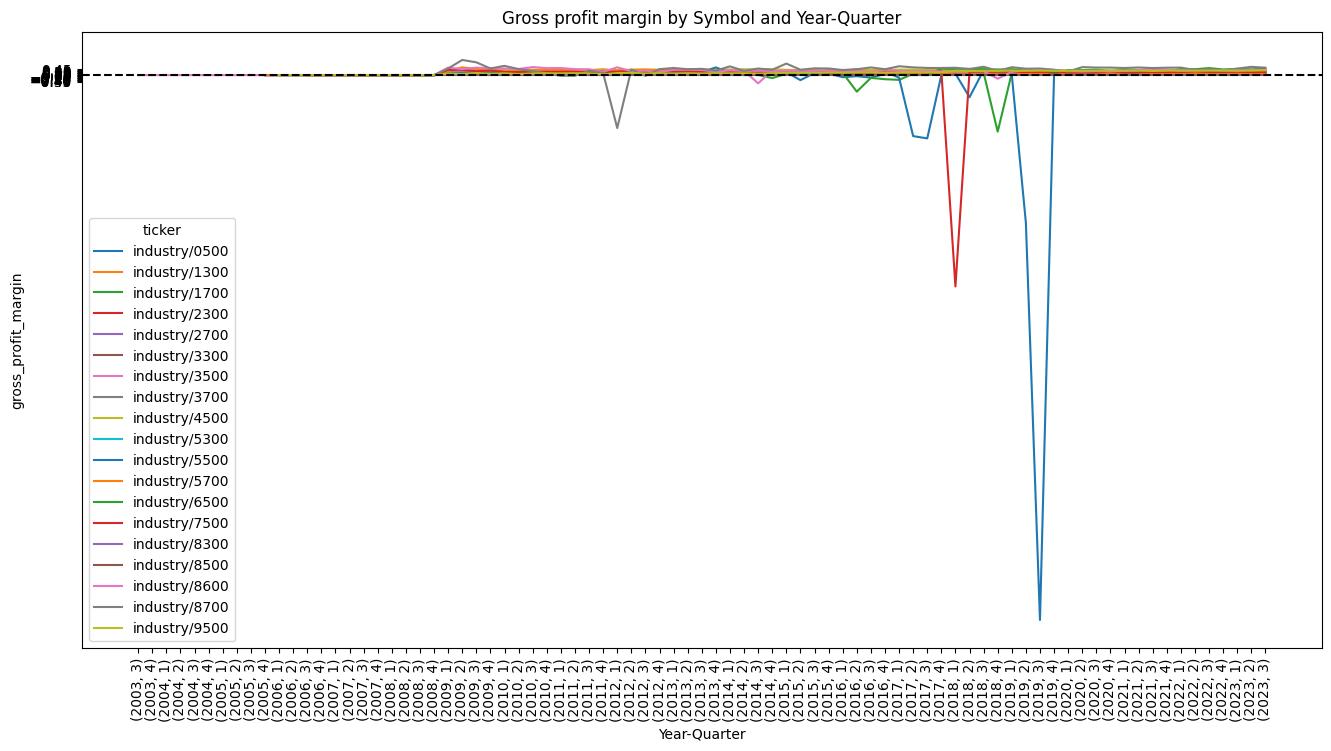

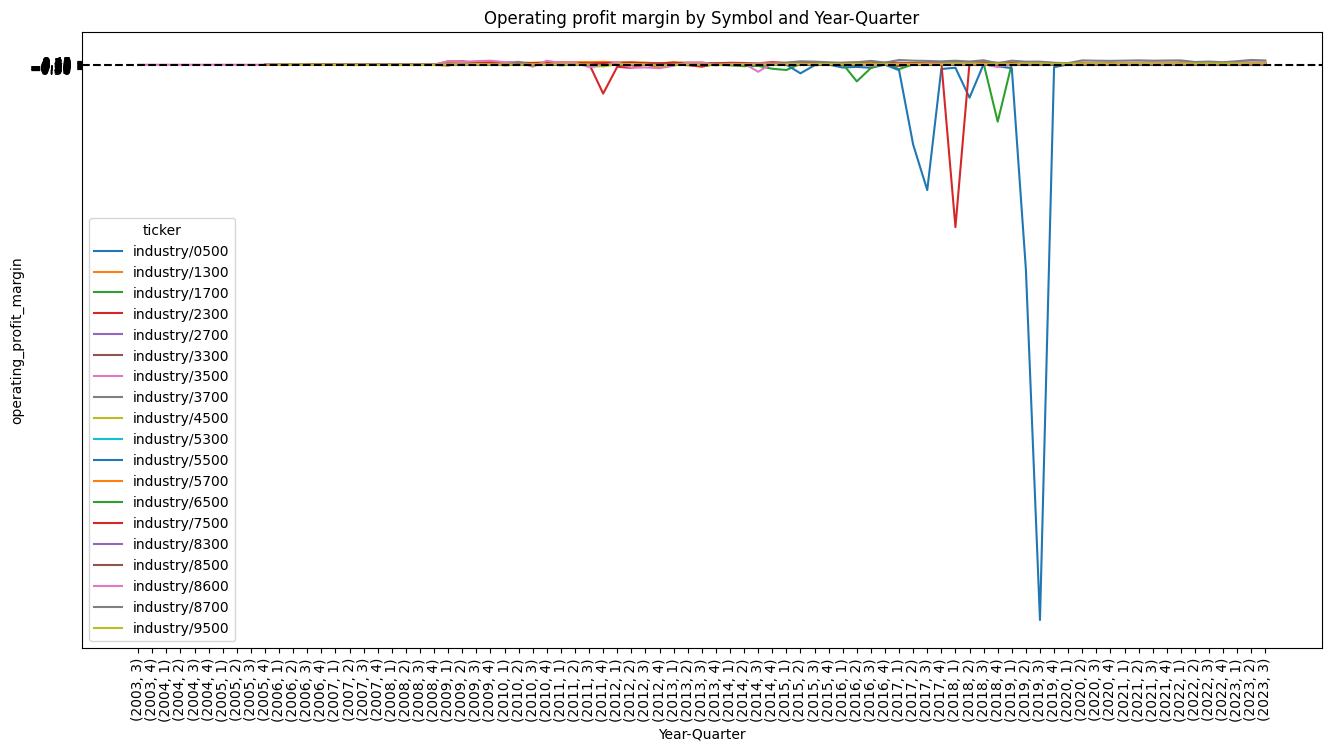

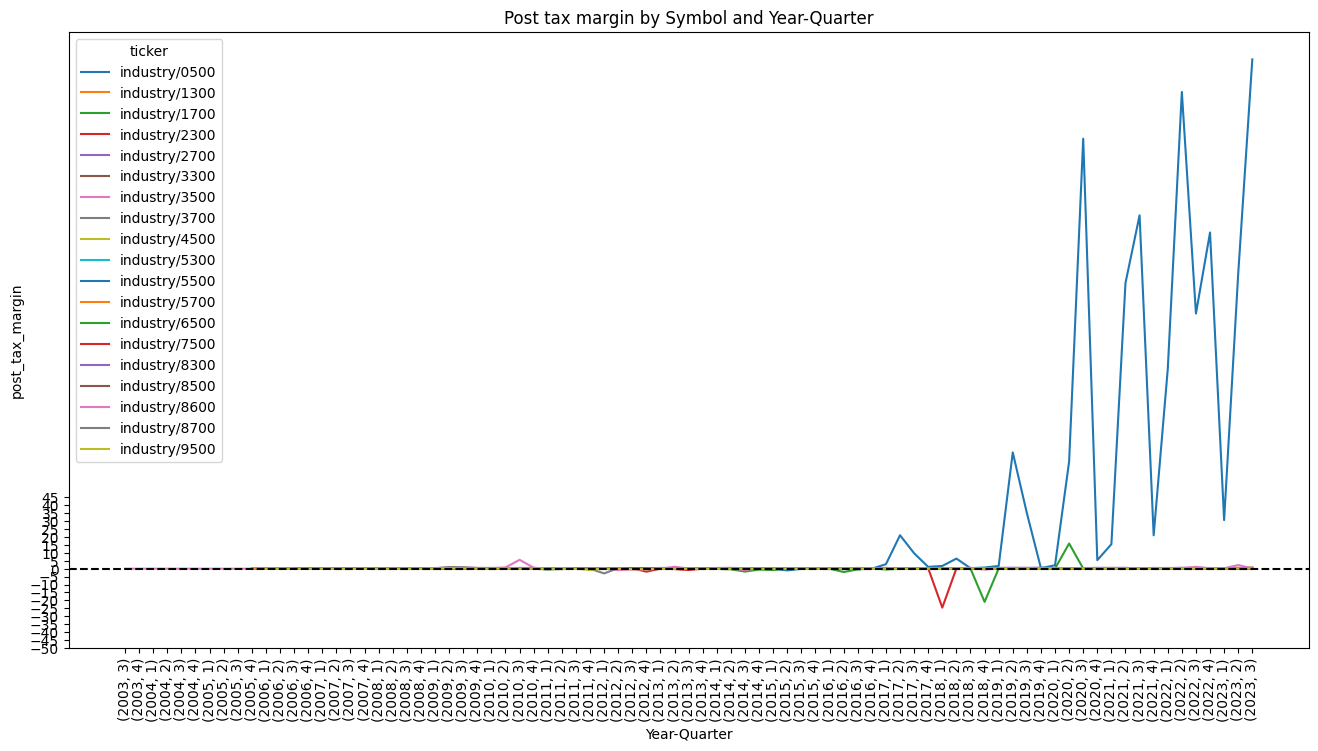

In [37]:
pivoted = df_financial_ratios.pivot(index=("year", "quarter"), columns="ticker", values="roe")
ax = pivoted.plot(title="ROE by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="ROE", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))
ax.set_yticks(np.arange(-0.5,0.5,0.05))
ax.set_xticklabels(pivoted.index.to_list(), rotation=90)
ax.axhline (y=0, color="black", linestyle="--")
plt.show()

pivoted = df_financial_ratios.pivot(index=("year", "quarter"), columns="ticker", values="roa")
ax = pivoted.plot(title="ROA by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="ROA", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))
ax.set_yticks(np.arange(-0.5,0.5,0.05))
ax.set_xticklabels(pivoted.index.to_list(), rotation=90)
ax.axhline (y=0, color="black", linestyle="--")
plt.show()

pivoted = df_financial_ratios.pivot(index=("year", "quarter"), columns="ticker", values="gross_profit_margin")
ax = pivoted.plot(title="Gross profit margin by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="gross_profit_margin", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))
ax.set_yticks(np.arange(-0.5,0.5,0.05))
ax.set_xticklabels(pivoted.index.to_list(), rotation=90)
ax.axhline (y=0, color="black", linestyle="--")
plt.show()

pivoted = df_financial_ratios.pivot(index=("year", "quarter"), columns="ticker", values="operating_profit_margin")
ax = pivoted.plot(title="Operating profit margin by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="operating_profit_margin", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))
ax.set_yticks(np.arange(-0.5,0.5,0.05))
ax.set_xticklabels(pivoted.index.to_list(), rotation=90)
ax.axhline (y=0, color="black", linestyle="--")
plt.show()

pivoted = df_financial_ratios.pivot(index=("year", "quarter"), columns="ticker", values="post_tax_margin")
ax = pivoted.plot(title="Post tax margin by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="post_tax_margin", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))
ax.set_yticks(np.arange(-50,50,5))
ax.set_xticklabels(pivoted.index.to_list(), rotation=90)
ax.axhline (y=0, color="black", linestyle="--")
plt.show()

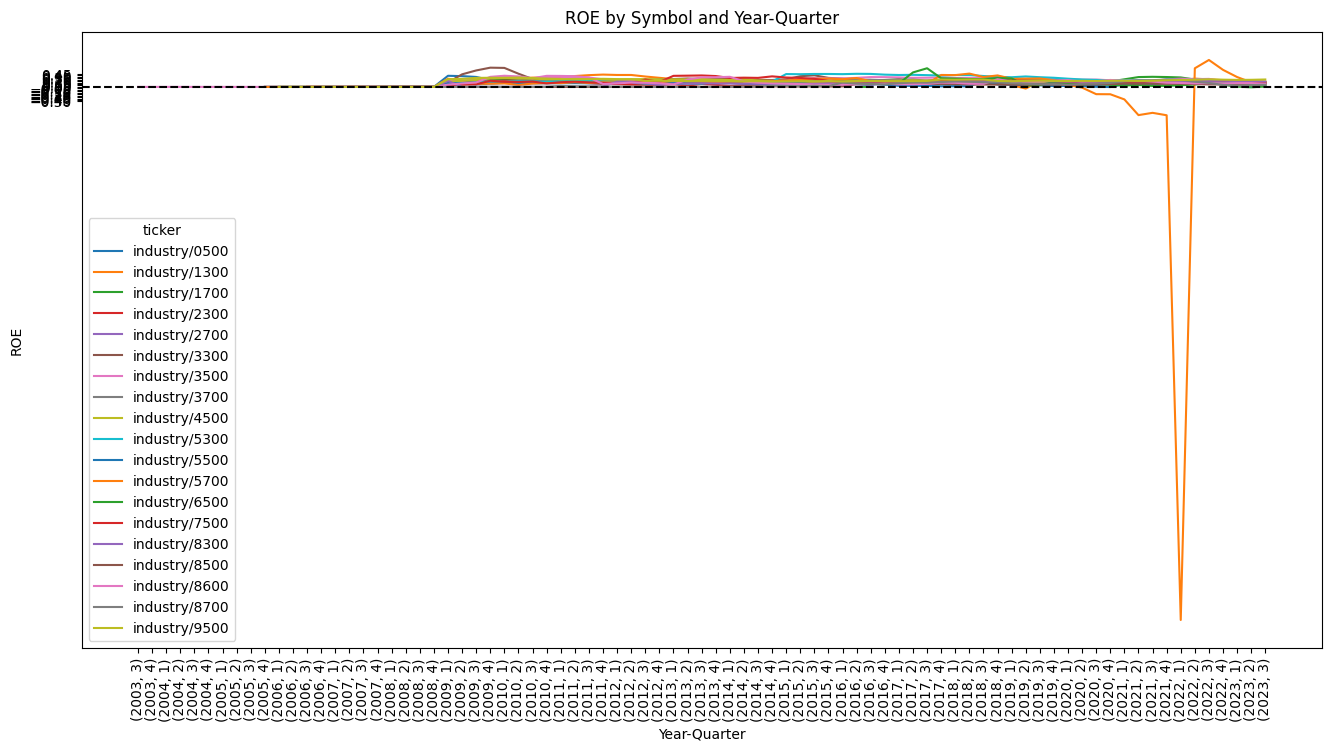

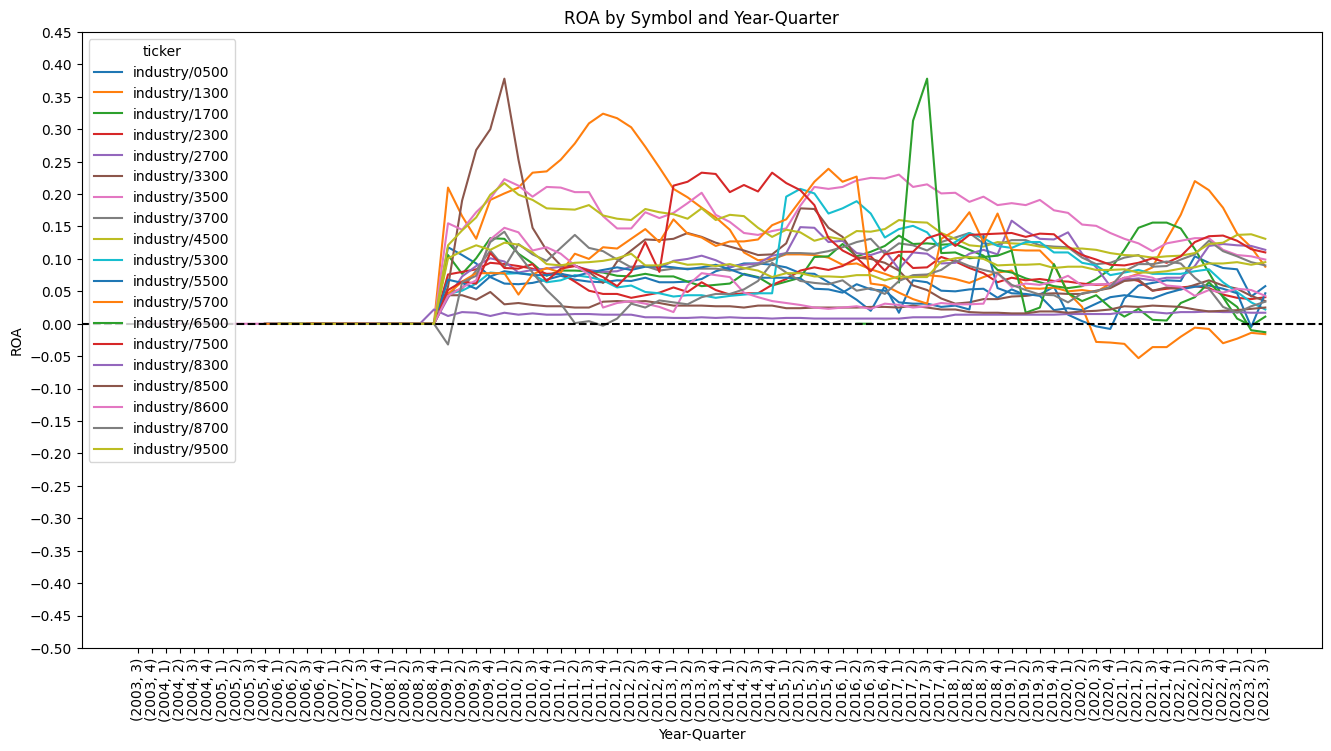

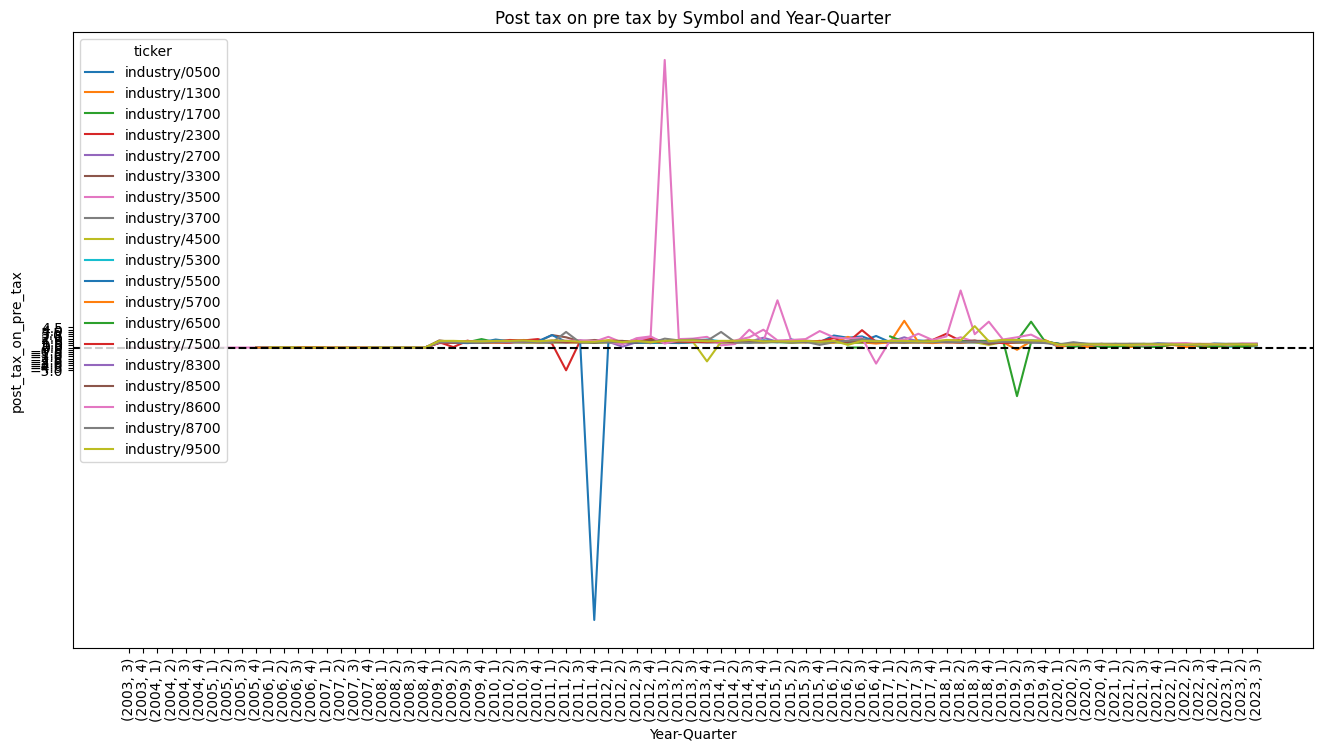

In [35]:
pivoted = df_financial_ratios.pivot(index=("year", "quarter"), columns="ticker", values="roe")
ax = pivoted.plot(title="ROE by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="ROE", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))
ax.set_yticks(np.arange(-0.5,0.5,0.05))
ax.set_xticklabels(pivoted.index.to_list(), rotation=90)
ax.axhline (y=0, color="black", linestyle="--")
plt.show()

pivoted = df_financial_ratios.pivot(index=("year", "quarter"), columns="ticker", values="roa")
ax = pivoted.plot(title="ROA by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="ROA", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))
ax.set_yticks(np.arange(-0.5,0.5,0.05))
ax.set_xticklabels(pivoted.index.to_list(), rotation=90)
ax.axhline (y=0, color="black", linestyle="--")
plt.show()

pivoted = df_financial_ratios.pivot(index=("year", "quarter"), columns="ticker", values="post_tax_on_pre_tax")
ax = pivoted.plot(title="Post tax on pre tax by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="post_tax_on_pre_tax", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))
ax.set_yticks(np.arange(-5,5,0.5))
ax.set_xticklabels(pivoted.index.to_list(), rotation=90)
ax.axhline (y=0, color="black", linestyle="--")
plt.show()

In [49]:
# SSI KEY
CONSUMER_ID = "ba79b52460024f1dba342779a54162e5"
CONSUMER_SECRET = "df0fe7beb4c04ddfb9854287241667c9"
PUBLIC_KEY = "PFJTQUtleVZhbHVlPjxNb2R1bHVzPjRWQmF5NTllWkJ0SnB5ekdqbmNmMmhsemY1ZUZVYWNyTEpGTXFtZ2V4L2tvdjdUVlNQUmF3WFB4cjRSRUZQZ1dhZXdOd3pmTDFiWFhRM0k5M1ppQ0dadTNOckVTMFY4ZTN4MnVsYXFrVk9OeEJBS0dJQkFKWXdQNFZBL3ZsVUlsYjl4SE1Cbkxma0JubjZCS3BKL2g4d1ZqMDZzQ00rRzR6SWNyUEY2SWdGRT08L01vZHVsdXM+PEV4cG9uZW50PkFRQUI8L0V4cG9uZW50PjwvUlNBS2V5VmFsdWU+"
PRIVATE_KEY = "PFJTQUtleVZhbHVlPjxNb2R1bHVzPjRWQmF5NTllWkJ0SnB5ekdqbmNmMmhsemY1ZUZVYWNyTEpGTXFtZ2V4L2tvdjdUVlNQUmF3WFB4cjRSRUZQZ1dhZXdOd3pmTDFiWFhRM0k5M1ppQ0dadTNOckVTMFY4ZTN4MnVsYXFrVk9OeEJBS0dJQkFKWXdQNFZBL3ZsVUlsYjl4SE1Cbkxma0JubjZCS3BKL2g4d1ZqMDZzQ00rRzR6SWNyUEY2SWdGRT08L01vZHVsdXM+PEV4cG9uZW50PkFRQUI8L0V4cG9uZW50PjxQPjkvNDBpWFJESmR3U3JIa0Y4b3NBM1FFdFFPbW5IYmh4WURqZW11SlpQUHdFNW9VMTJHN0tDZ1VtZlFIZGhTdDRIK0daSHkxM3dsYzY4NWx6bS95R2l3PT08L1A+PFE+NkpheHkrT3Z6ekU5RTVJQ0Qrb09acHh4L2lPdEduWTFHYlA5bWpGZEd5WHB1dlZRK0VhekllRnB3cUpYVHRpUVFjaWZueUpyaE5RRDZnWW1LUFFNRXc9PTwvUT48RFA+RU00SUQxeHloR2xDVnErb3lJUEUzalVMTlAvZ1ZESkFkSTNGLytiZ3R6STR2c28rR05tQkZXYTk4ZkNqYXpmRDN4MHhmQnhmcGlxMUV2Yk9ENzd2K3c9PTwvRFA+PERRPk5JOXBXbVAzcE9EQnBweUdMc1o3dnFCMytqQmh1K3Nla05KbDZ1UmczL092WC9wejg4YzJUOSs2b0t0REE2Ulk1U1RMUFpEdnJ6S2lOODV2N1MxSlZRPT08L0RRPjxJbnZlcnNlUT5ULzhkWW9kMDM0U1pjQmRhYXI0OVROaS9qSWdIc3IwanB6NUhrOVIvTnhCQXVrWitYK3dHV2tDRHVBZkMvb25xeEl2Q2tlK09MZGxRUFFWVWM5eVRmdz09PC9JbnZlcnNlUT48RD5ZQXpEUi82ZVhJcU5jV2pURkRTUUxZZWdCd3B1MlFvc2k0azlaMytQYjZ3MXhOT3dBTE82WkxHcW5Db0VZL1FHaWcwSktPbUdTWXFGUThsVnVqdWphYjVxdUZzQ1pJSlBEaERiQWk1cVNJSUR1ZmJpYmZPTTJjYjNjSmFxR0hNbUgxY1RuQzc5NUdQN1NMVG8vc3VueExrYkRJSk8yYkdwR25UbWcrQjZOZWs9PC9EPjwvUlNBS2V5VmFsdWU+"

BASE_URL = 'https://fc-data.ssi.com.vn/'
STREAM_URL = 'https://fc-data.ssi.com.vn/'
auth_type = 'Bearer'

INDUSTRIES = {
#     "Transportation and Warehousing": ["VTO", "PVT", "GSP", "VIP", "VOS", "VSC"]
#     "rubber": ["BRC", "CSM", "DRC", "SRC"]
    "consumer_goods": ["LIX"] #LIX
#     "financials": ["BVH", "VHM", "SSI", "FUEVFVND", "VND", "KDH"] 
#      "consumer_services": ["MWG", "FRT", "DGW", "SKG", "VNS"] #
#     "basic_materials": ["MVB", "PHR", "SHI", "NHH", "VFG", "VIF"] # VFG, PHR
#     "IT": ["SAM", "CMG", "ST8"]
#     "industry": ["BMP", "PVP", "DVP", "TCL" ,"HAH"]
#     "elc": ["PPC", "TDM", "TMP", "SBA", "SHP"]
}

In [50]:
class PeriodType(Enum):
    QUATERLY = 1
    YEARLY = 2
    
class ReportType(Enum):
    BALANCE_SHEET = 1
    INCOME_STATEMENT = 2

class IncomeStatement:
    def __init__(self):
        self.period_type = PeriodType.QUATERLY
        self.gross_revenue = 0
        self.net_revenue = 0
        self.gross_profit = 0
        self.operating_profit = 0
        self.ebit = 0
        self.net_profit = 0

class FinancialStatement:
    def __init__(self):
        self.symbol = ""
        self.industry = ""
        self.income_statement = []
        
def get_financial_statements_from_fireant(year, quarter):
    base_url = "https://api.fireant.vn"
    token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiIsIng1dCI6IkdYdExONzViZlZQakdvNERWdjV4QkRITHpnSSIsImtpZCI6IkdYdExONzViZlZQakdvNERWdjV4QkRITHpnSSJ9.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmZpcmVhbnQudm4iLCJhdWQiOiJodHRwczovL2FjY291bnRzLmZpcmVhbnQudm4vcmVzb3VyY2VzIiwiZXhwIjoxODg5NjIyNTMwLCJuYmYiOjE1ODk2MjI1MzAsImNsaWVudF9pZCI6ImZpcmVhbnQudHJhZGVzdGF0aW9uIiwic2NvcGUiOlsiYWNhZGVteS1yZWFkIiwiYWNhZGVteS13cml0ZSIsImFjY291bnRzLXJlYWQiLCJhY2NvdW50cy13cml0ZSIsImJsb2ctcmVhZCIsImNvbXBhbmllcy1yZWFkIiwiZmluYW5jZS1yZWFkIiwiaW5kaXZpZHVhbHMtcmVhZCIsImludmVzdG9wZWRpYS1yZWFkIiwib3JkZXJzLXJlYWQiLCJvcmRlcnMtd3JpdGUiLCJwb3N0cy1yZWFkIiwicG9zdHMtd3JpdGUiLCJzZWFyY2giLCJzeW1ib2xzLXJlYWQiLCJ1c2VyLWRhdGEtcmVhZCIsInVzZXItZGF0YS13cml0ZSIsInVzZXJzLXJlYWQiXSwianRpIjoiMjYxYTZhYWQ2MTQ5Njk1ZmJiYzcwODM5MjM0Njc1NWQifQ.dA5-HVzWv-BRfEiAd24uNBiBxASO-PAyWeWESovZm_hj4aXMAZA1-bWNZeXt88dqogo18AwpDQ-h6gefLPdZSFrG5umC1dVWaeYvUnGm62g4XS29fj6p01dhKNNqrsu5KrhnhdnKYVv9VdmbmqDfWR8wDgglk5cJFqalzq6dJWJInFQEPmUs9BW_Zs8tQDn-i5r4tYq2U8vCdqptXoM7YgPllXaPVDeccC9QNu2Xlp9WUvoROzoQXg25lFub1IYkTrM66gJ6t9fJRZToewCt495WNEOQFa_rwLCZ1QwzvL0iYkONHS_jZ0BOhBCdW9dWSawD6iF1SIQaFROvMDH1rg"

    def _get_financial_report_by_symbol(symbol, report_type, year, quarter):
        endpoint = "{base_url}/symbols/{symbol}/full-financial-reports".format(base_url = base_url, symbol = symbol)
        resp = requests.get(endpoint, params={
            "type": report_type,
            "year": year,
            "quarter": quarter,
            "limit": 100
        }, headers={
            "Authorization": "Bearer {token}".format(token = token)
        })
        return resp
    def _get_items_by_attribute(items, attribute):
        for item in items:
            if attribute in item["name"].lower():
                return item["values"]
        return []
    
    df = pd.DataFrame(columns=["symbol", "industry", "period", "year", "quarter", "total_asset", "shareholders_equity", "net_revenue", "gross_profit", "operating_profit", "ebit", "net_profit", "gross_profit_margin", "operating_profit_margin", "pretax_profit_margin", "net_profit_margin", "roa", "roe"])

    for industry, symbols in INDUSTRIES.items():
        for symbol in symbols:
            print(symbol)
            print("#####")
            income_statements = _get_financial_report_by_symbol(symbol, ReportType.INCOME_STATEMENT.value, year, quarter).json()
            balance_sheet = _get_financial_report_by_symbol(symbol, ReportType.BALANCE_SHEET.value, year, quarter).json()            
            
            min_row = min(len(income_statements[0]["values"]), len(balance_sheet[0]["values"]))
            net_revenues = _get_items_by_attribute(income_statements, "doanh thu thuần")
            gross_profits = _get_items_by_attribute(income_statements, "lợi nhuận gộp")
            operating_profits = _get_items_by_attribute(income_statements, "lợi nhuận thuần từ hoạt động kinh doanh")
            selling_expenses = _get_items_by_attribute(income_statements, "chi phí bán hàng")
            general_and_admin_expenses = _get_items_by_attribute(income_statements, "chi phí quản lý doanh nghiệp")
            net_profits = _get_items_by_attribute(income_statements, "lợi nhuận sau thuế của cổ đông của công ty mẹ")
            total_assets = _get_items_by_attribute(balance_sheet, "tổng cộng tài sản")
            
            shareholders_equities = _get_items_by_attribute(balance_sheet, "nguồn vốn chủ sở hữu")
            for i in range(min_row):
                if income_statements[0]["values"][-1 - i]["period"] != balance_sheet[0]["values"][-1 - i]["period"]:
                    break
                total_asset = total_assets[-1 - i]["value"]
                shareholders_equity = shareholders_equities[-1 - i]["value"]
                net_revenue = net_revenues[-1 - i]["value"]
                gross_profit = gross_profits[-1 - i]["value"]
                operating_profit = operating_profits[-1 - i]["value"]
                ebit = gross_profits[-1 - i]["value"] + (selling_expenses[-1 - i]["value"] + general_and_admin_expenses[-1 - i]["value"])
                net_profit = net_profits[-1 - i]["value"]
                
                gross_profit_margin = gross_profit / net_revenue * 100
                operating_profit_margin = operating_profit / net_revenue * 100
                pretax_profit_margin = ebit / net_revenue * 100
                net_profit_margin = net_profit / net_revenue * 100
                
                if (i + 2) > len(total_assets):
                    prev_total_asset = 0
                else:
                    prev_total_asset = total_assets[-i - 2]["value"]
                
                if (i + 2) > len(shareholders_equities):
                    prev_shareholders_equity = 0
                else:
                    prev_shareholders_equity = shareholders_equities[-i - 2]["value"]
                roa = net_profit / ((total_asset + (prev_total_asset)) / 2) * 100
                roe = net_profit / ((shareholders_equity + (prev_shareholders_equity)) / 2) * 100

                new_row = pd.Series([
                    symbol, 
                    "", 
                    income_statements[0]["values"][-1 - i]["period"], 
                    income_statements[0]["values"][-1 - i]["year"], 
                    income_statements[0]["values"][-1 - i]["quarter"], 
                    total_assets,
                    shareholders_equity,
                    net_revenue, 
                    gross_profit,
                    operating_profit,
                    ebit,
                    net_profit,
                    gross_profit_margin,
                    operating_profit_margin,
                    pretax_profit_margin,
                    net_profit_margin,
                    roa,
                    roe
                ], index=df.columns)
                df = pd.concat([df, new_row.to_frame().T], ignore_index=True)
            time.sleep(1)
    return df

In [51]:
df = get_financial_statements_from_fireant(2099, 1)

LIX
#####


In [70]:
df.head()

,symbol,industry,period,year,quarter,total_asset,shareholders_equity,net_revenue,gross_profit,operating_profit,ebit,net_profit,gross_profit_margin,operating_profit_margin,pretax_profit_margin,net_profit_margin,roa,roe
0,LIX,,Q3 2023,2023,3,"[{'period': 'Q4 2006', 'year': 2006, 'quarter'...",840450059192.0,717632776209.0,165335364667.0,65239195327.0,267972795683.0,52200617659.0,23.038993,9.090888,37.341215,7.274001,4.190836,6.410098
1,LIX,,Q2 2023,2023,2,"[{'period': 'Q4 2006', 'year': 2006, 'quarter'...",788249441533.0,678956696958.0,165347818095.0,69561250352.0,263650915893.0,47703615114.0,24.35322,10.245315,38.831772,7.026017,3.985665,5.845648
2,LIX,,Q1 2023,2023,1,"[{'period': 'Q4 2006', 'year': 2006, 'quarter'...",843857447082.0,677761471935.0,153554702270.0,55092088901.0,254004833968.0,44316909710.0,22.656157,8.128537,37.477025,6.538718,3.653333,5.238412
3,LIX,,Q4 2022,2022,4,"[{'period': 'Q4 2006', 'year': 2006, 'quarter'...",848140537372.0,724281126456.0,153241300787.0,60345964914.0,247485149164.0,46509385520.0,21.15771,8.331843,34.169764,6.421455,3.825211,5.638281
4,LIX,,Q3 2022,2022,3,"[{'period': 'Q4 2006', 'year': 2006, 'quarter'...",801631151852.0,729616431483.0,167395431329.0,66236399484.0,269205994312.0,52992232584.0,22.942936,9.078249,36.89692,7.263026,4.355507,6.836516


In [62]:
df.to_csv('out.csv', index=False)  

<IPython.core.display.Javascript object>


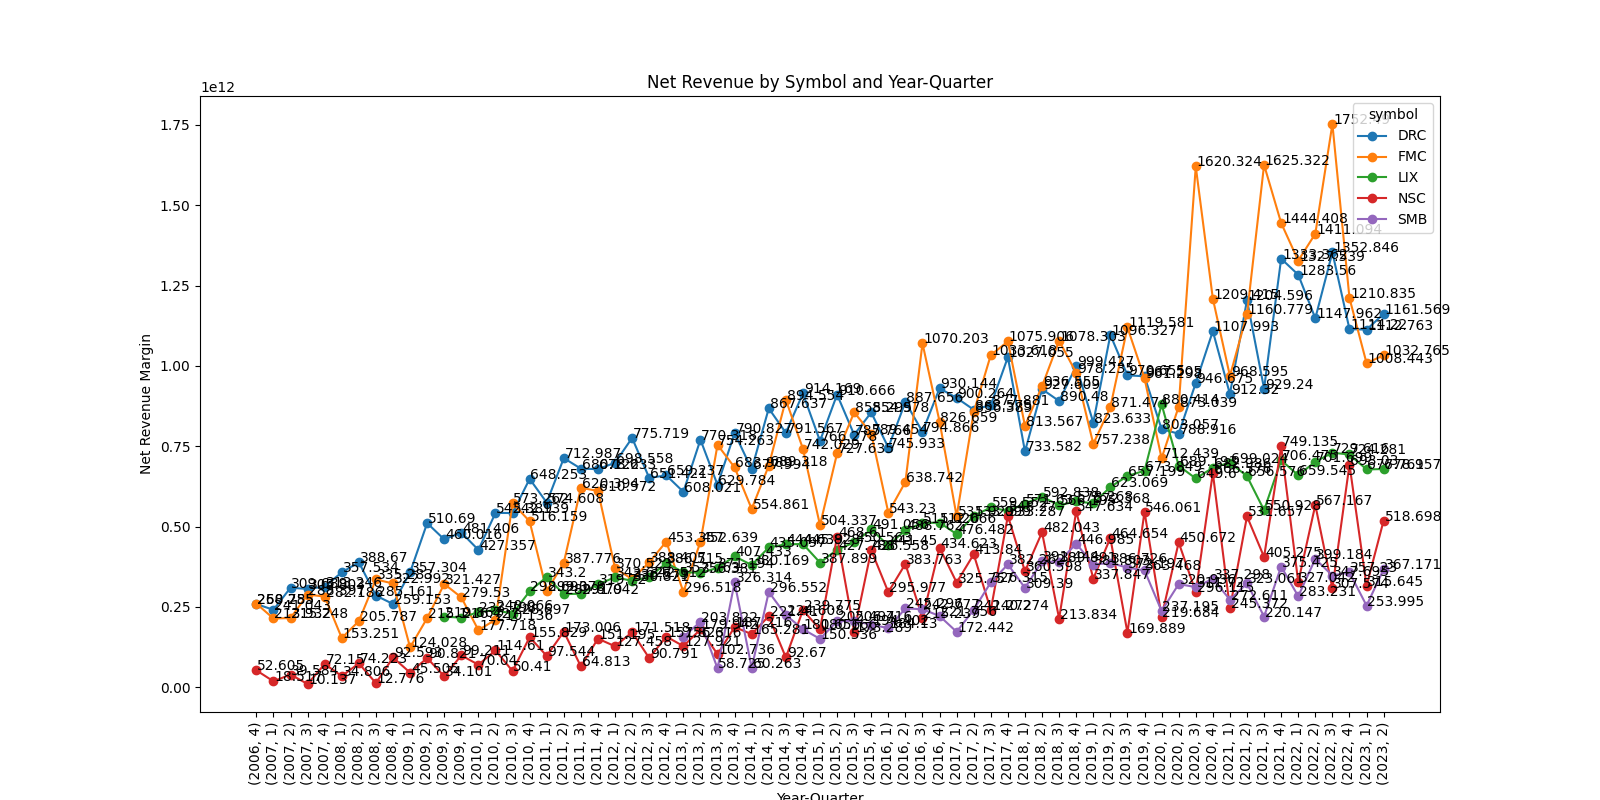

In [123]:
pivoted = df.pivot(index=("year", "quarter"), columns="symbol", values="net_revenue")
ax = pivoted.plot(title="Net Revenue by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="Net Revenue Margin", marker="o", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))

labels = pivoted.index.to_list()
ax.set_xticklabels(labels, rotation=90)

for i in range (len(labels)):
    for j in range (len (pivoted.columns)):
        # Get the x and y coordinates of the point
        x = i
        y = pivoted.iloc [i,j]
        # Get the symbol name of the point
        symbol = pivoted.columns [j]
        # Set the text content and format
        text = f"{round(y / (10**9), 3)}"
        # Add the text annotation to the plot
        ax.text (x+0.05, y+5, text)
        
plt.show()

In [124]:
np.arange(-100,100,5)

array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95])

<IPython.core.display.Javascript object>


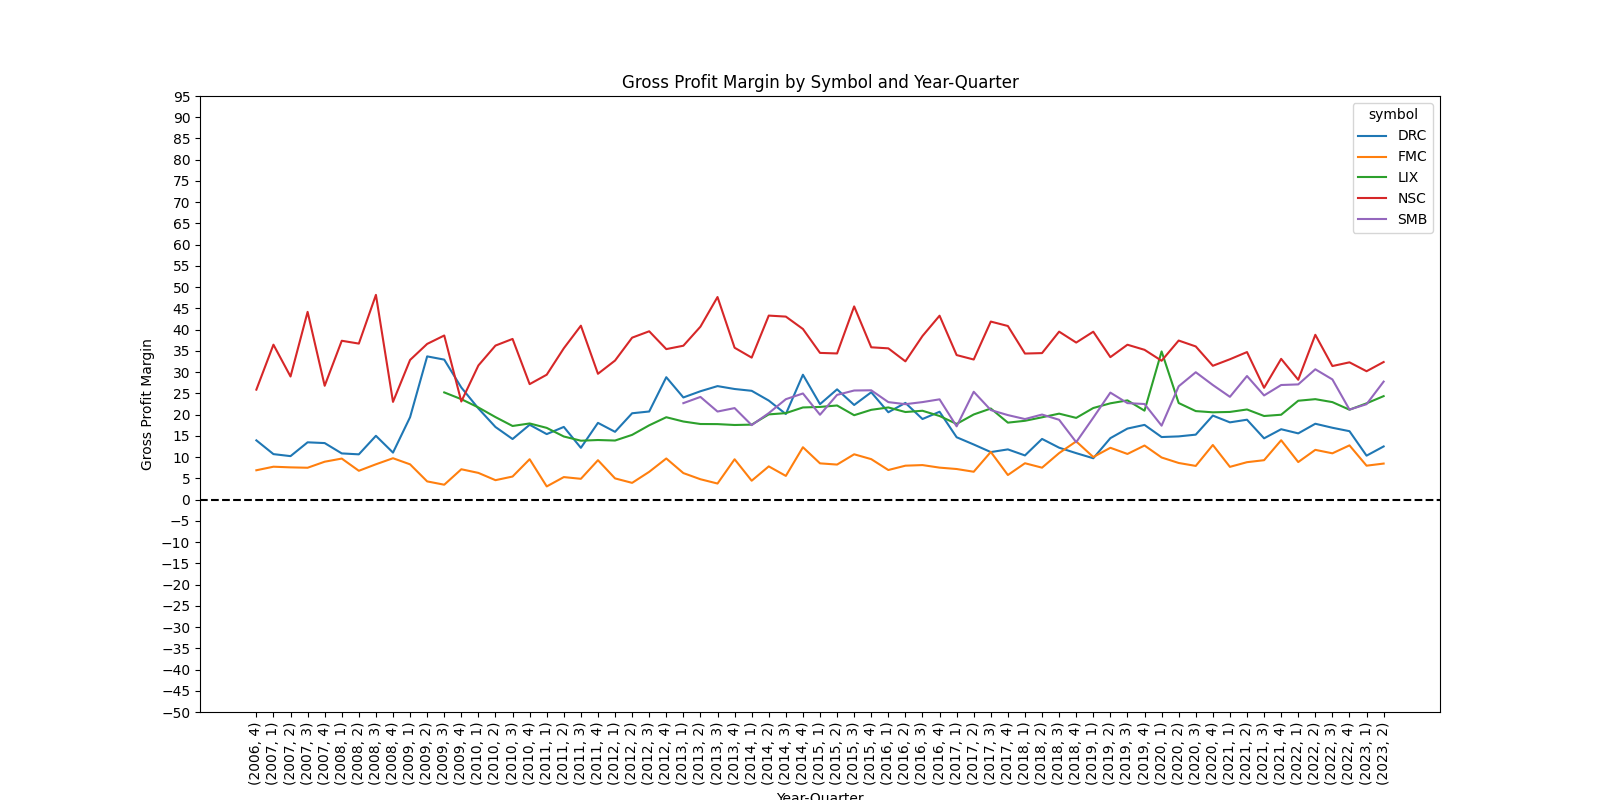

In [125]:
pivoted = df.pivot(index=("year", "quarter"), columns="symbol", values="gross_profit_margin")
ax = pivoted.plot(title="Gross Profit Margin by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="Gross Profit Margin", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))
ax.set_yticks(np.arange(-50,100,5))
ax.set_xticklabels(pivoted.index.to_list(), rotation=90)
ax.axhline (y=0, color="black", linestyle="--")
plt.show()

<IPython.core.display.Javascript object>


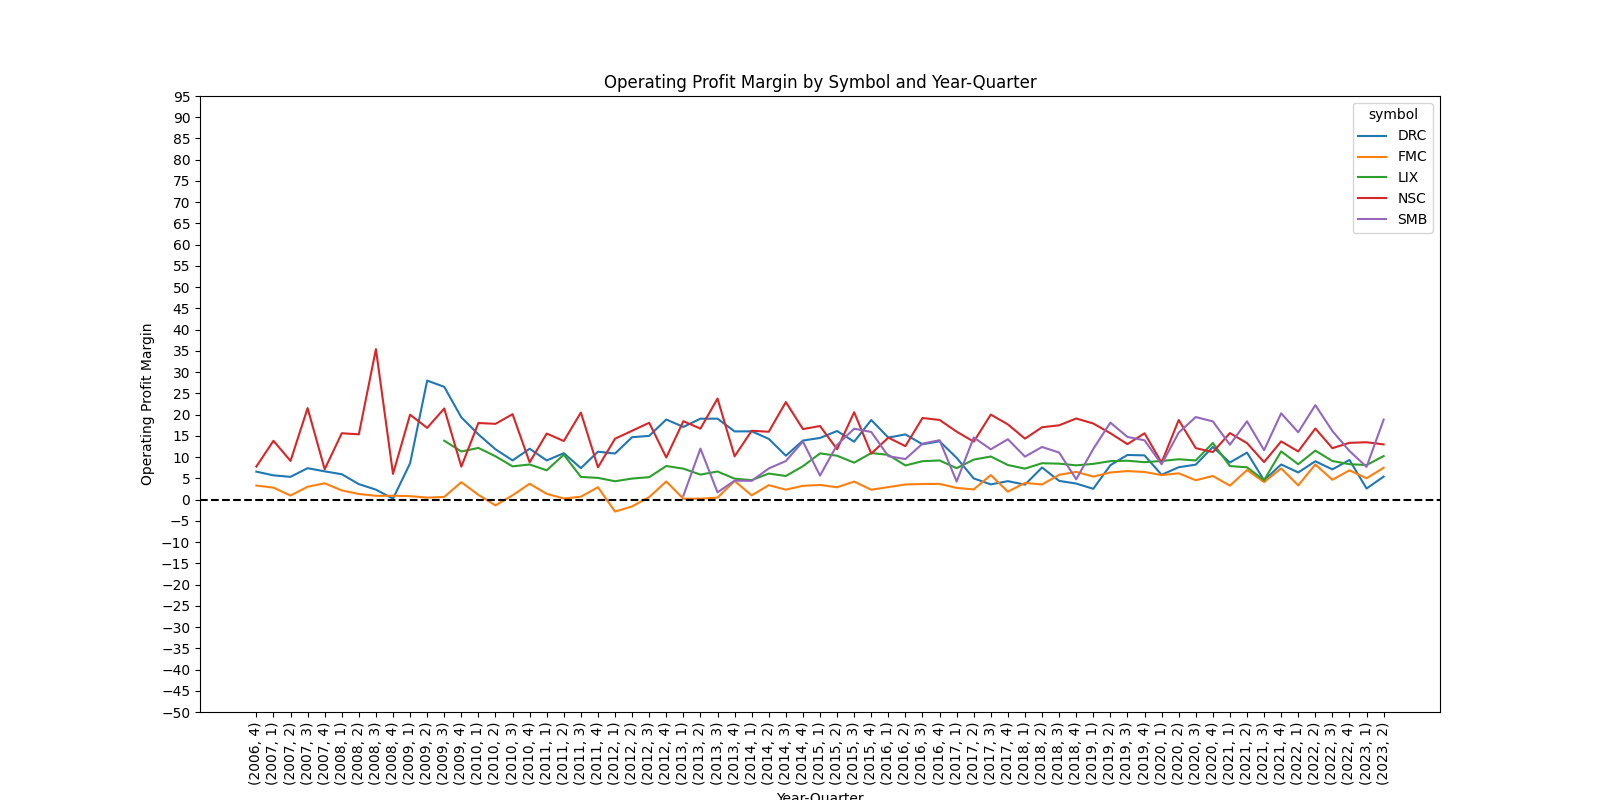

In [126]:
pivoted = df.pivot(index=("year", "quarter"), columns="symbol", values="operating_profit_margin")
ax = pivoted.plot(title="Operating Profit Margin by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="Operating Profit Margin", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))
ax.set_yticks(np.arange(-50,100,5))
ax.set_xticklabels(pivoted.index.to_list(), rotation=90)
ax.axhline (y=0, color="black", linestyle="--")
plt.show()

<IPython.core.display.Javascript object>


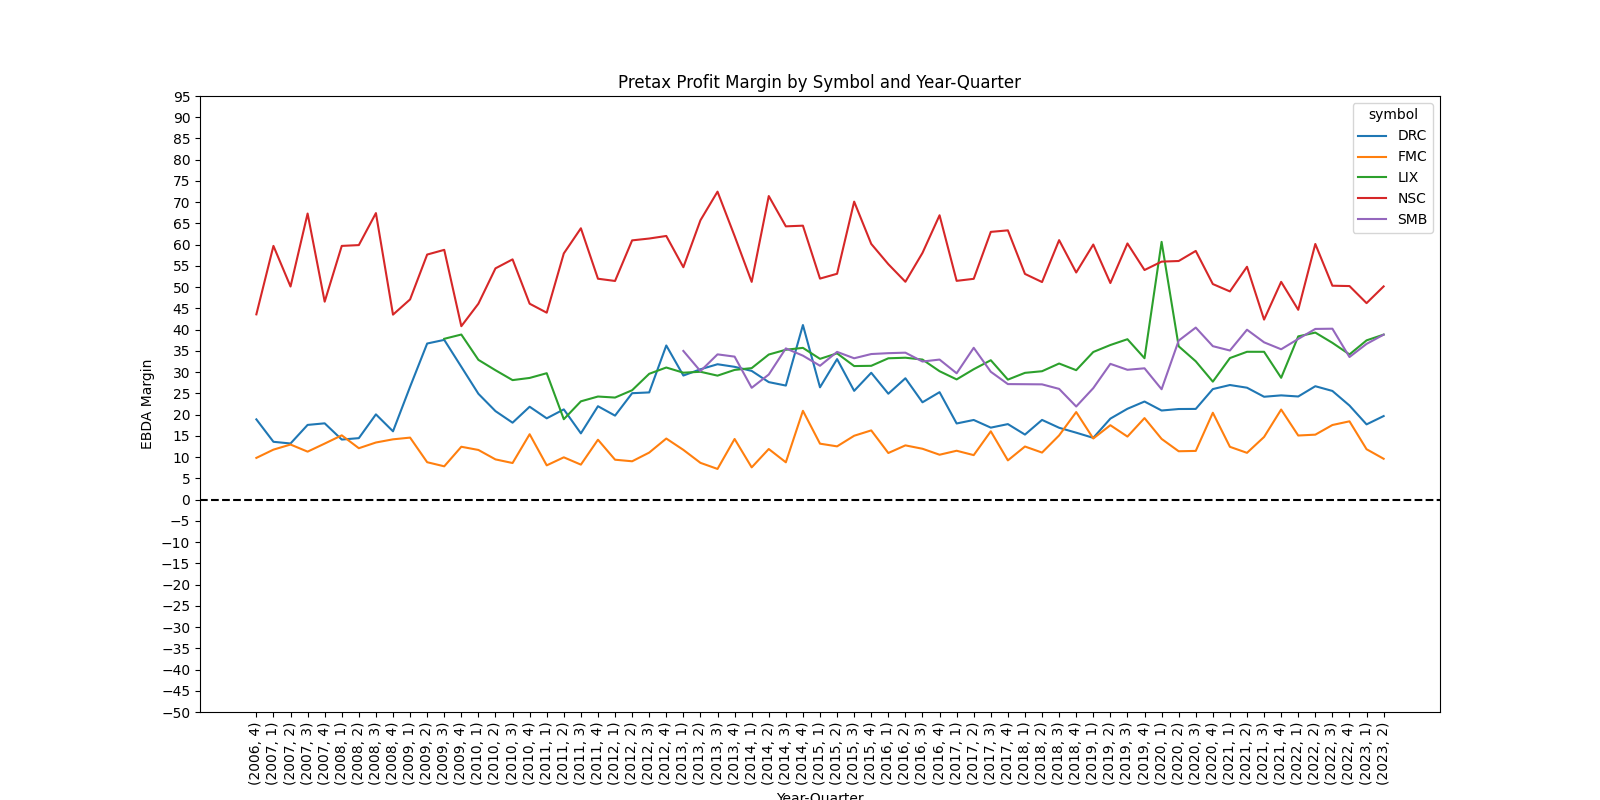

In [127]:
pivoted = df.pivot(index=("year", "quarter"), columns="symbol", values="pretax_profit_margin")
ax = pivoted.plot(title="Pretax Profit Margin by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="EBDA Margin", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))
ax.set_yticks(np.arange(-50,100,5))
ax.set_xticklabels(pivoted.index.to_list(), rotation=90)
ax.axhline (y=0, color="black", linestyle="--")
plt.show()

<IPython.core.display.Javascript object>


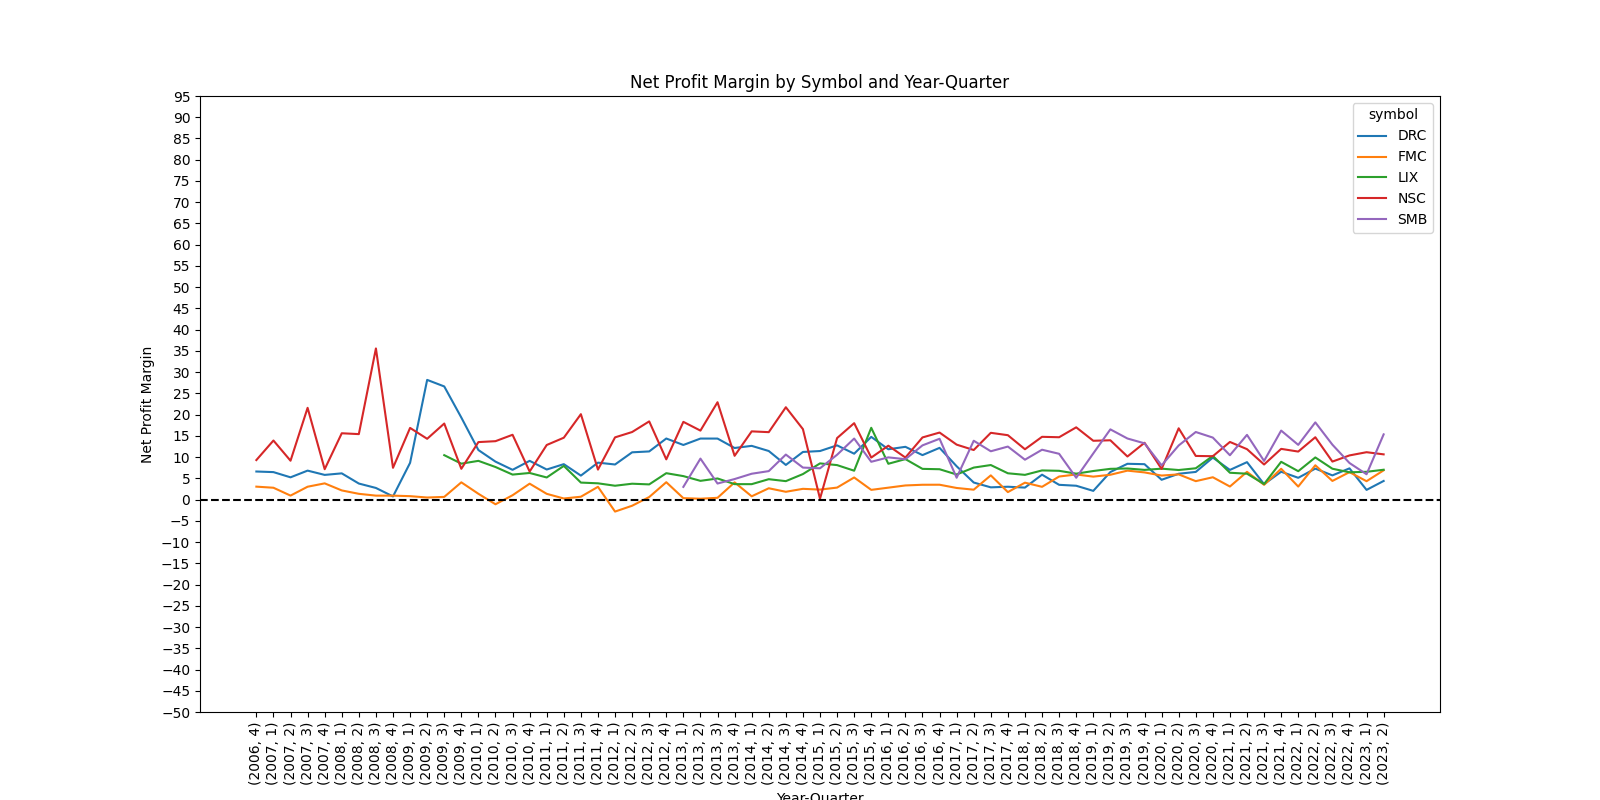

In [128]:
pivoted = df.pivot(index=("year", "quarter"), columns="symbol", values="net_profit_margin")
ax = pivoted.plot(title="Net Profit Margin by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="Net Profit Margin", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))
ax.set_yticks(np.arange(-50,100,5))
ax.set_xticklabels(pivoted.index.to_list(), rotation=90)
ax.axhline (y=0, color="black", linestyle="--")
plt.show()

<IPython.core.display.Javascript object>


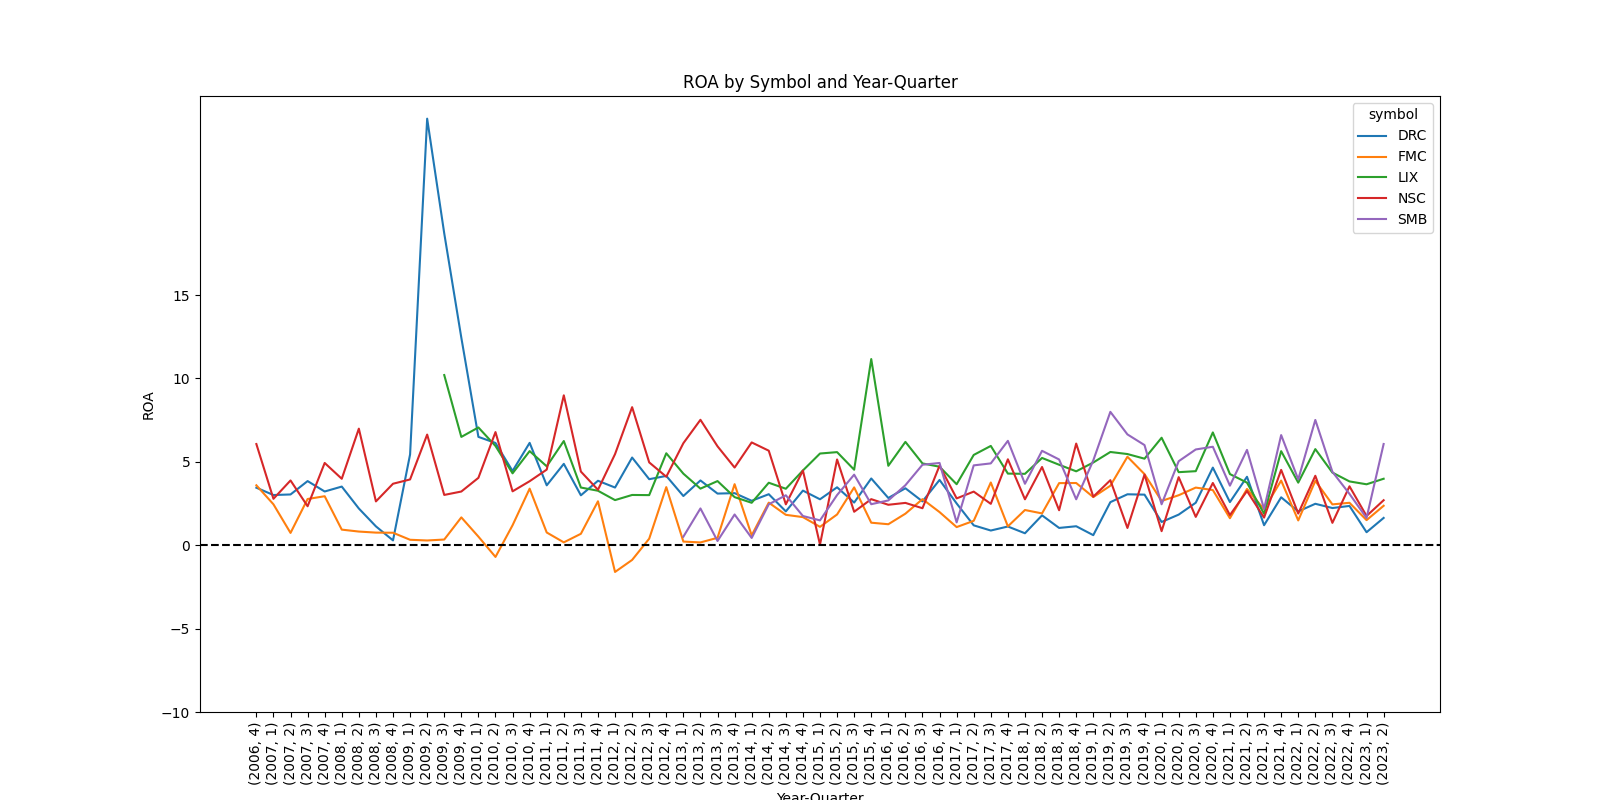

In [129]:
pivoted = df.pivot(index=("year", "quarter"), columns="symbol", values="roa")
ax = pivoted.plot(title="ROA by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="ROA", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))
ax.set_yticks(np.arange(-10,20,5))
ax.set_xticklabels(pivoted.index.to_list(), rotation=90)
ax.axhline (y=0, color="black", linestyle="--")
plt.show()

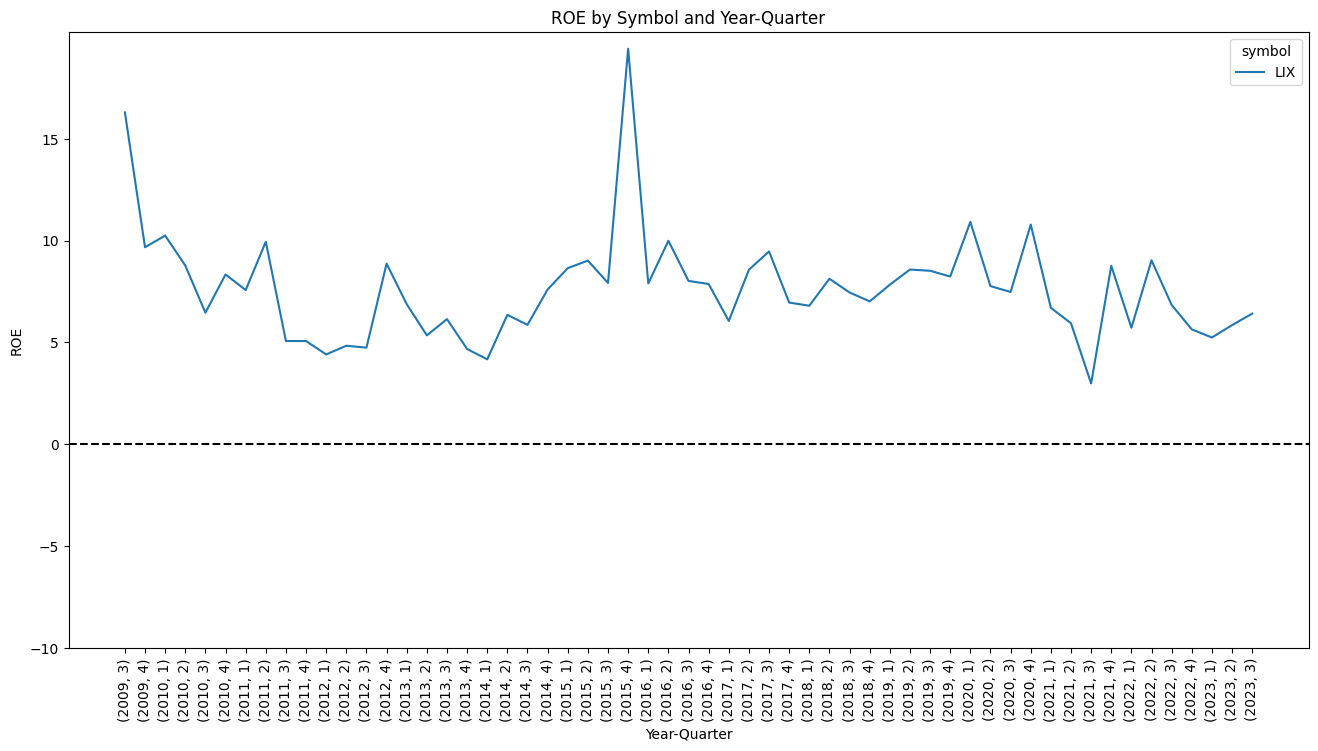

In [52]:
pivoted = df.pivot(index=("year", "quarter"), columns="symbol", values="roe")
ax = pivoted.plot(title="ROE by Symbol and Year-Quarter", xlabel="Year-Quarter", ylabel="ROE", figsize=(16,8))
ax.set_xticks(np.arange(pivoted.index.size))
ax.set_yticks(np.arange(-10,20,5))
ax.set_xticklabels(pivoted.index.to_list(), rotation=90)
ax.axhline (y=0, color="black", linestyle="--")
plt.show()